# Resume Scoring


**Workflow**
1. Creating corpus using Sketch Engine
2. Creating word embedding using Genism , Word2Vec
3. Preprocessing 
4. Removing common words that are not required
5. Creating phrases of words that frequently occur togther (bigrams)
6. Building word2vec model
7. Extracting resumes (using PyPDF) and converting to string
8. Building candidate profile using model.most_similar(skills), where skills is an array of required skills
9. Creating a matcher using Spacy to match the wods in resume to most_similar(skills)
12. Printing and visualizing the candidate profile

### Creating Corpus using sketch Engine

We used SketchEngine to create a corpus, wikipedia pages were given as input 


In [1]:
from PIL import Image


### Creating word embedding 

In [2]:
#pip install gensim


In [3]:
from gensim.models import Word2Vec
import string
import re
from nltk.corpus import stopwords
with open(r'F:\CSE499A\github codes\resume screening using NLP\skills.txt',encoding="utf8") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]

In [4]:
content[1]

'Data science is a "concept to unify statistics, data analysis, machine learning and their related methods" in order to "understand and analyze actual phenomena" with data. It employs techniques and theories drawn from many fields within the context of mathematics, statistics, information science, and computer science. Turing award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and the data deluge.'

In [5]:
from nltk.tokenize import word_tokenize
import gensim
from gensim.models.phrases import Phraser, Phrases

**Preprocessing**

In [6]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
x=[]
for line in content:
    tokens=word_tokenize(line)
    tok=[w.lower() for w in tokens]
    table=str.maketrans('','',string.punctuation)
    strpp=[w.translate(table) for w in tok]
    words=[word for word in strpp if word.isalpha()]
    stop_words=set(stopwords.words('english'))
    words=[w for w in words if not w in stop_words]
    x.append(words)

In [9]:
texts=x
#texts

In [10]:
print(texts[6])

['william', 'cleveland', 'introduced', 'data', 'science', 'independent', 'discipline', 'extending', 'field', 'statistics', 'incorporate', 'advances', 'computing', 'data', 'article', 'data', 'science', 'action', 'plan', 'expanding', 'technical', 'areas', 'field', 'statistics', 'published', 'volume', 'april', 'edition', 'international', 'statistical', 'review', 'revue', 'internationale', 'de', 'statistique', 'report', 'cleveland', 'establishes', 'six', 'technical', 'areas', 'believed', 'encompass', 'field', 'data', 'science', 'multidisciplinary', 'investigations', 'models', 'methods', 'data', 'computing', 'data', 'pedagogy', 'tool', 'evaluation', 'theory']


**Removing commonly occuring words that are not useful**

In [11]:
# #Removing commonly occuring words that are not useful

# with open('common.txt') as f:
#     content2 = f.read()
# ntexts=[]
# l=len(texts)
# for j in range(l):
#     s=texts[j]
#     res = [i for i in s if i not in content2]
#     ntexts.append(res)
# print(texts[6])

    

In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')  # Ensure stopwords are downloaded

# List of common words to remove
common_words = set(stopwords.words('english'))

# Removing common words from texts
ntexts = []
for sentence in texts:
    filtered_sentence = [word for word in sentence if word not in common_words]
    ntexts.append(filtered_sentence)

print(ntexts[6])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['william', 'cleveland', 'introduced', 'data', 'science', 'independent', 'discipline', 'extending', 'field', 'statistics', 'incorporate', 'advances', 'computing', 'data', 'article', 'data', 'science', 'action', 'plan', 'expanding', 'technical', 'areas', 'field', 'statistics', 'published', 'volume', 'april', 'edition', 'international', 'statistical', 'review', 'revue', 'internationale', 'de', 'statistique', 'report', 'cleveland', 'establishes', 'six', 'technical', 'areas', 'believed', 'encompass', 'field', 'data', 'science', 'multidisciplinary', 'investigations', 'models', 'methods', 'data', 'computing', 'data', 'pedagogy', 'tool', 'evaluation', 'theory']


In [13]:
print(ntexts[6])

['william', 'cleveland', 'introduced', 'data', 'science', 'independent', 'discipline', 'extending', 'field', 'statistics', 'incorporate', 'advances', 'computing', 'data', 'article', 'data', 'science', 'action', 'plan', 'expanding', 'technical', 'areas', 'field', 'statistics', 'published', 'volume', 'april', 'edition', 'international', 'statistical', 'review', 'revue', 'internationale', 'de', 'statistique', 'report', 'cleveland', 'establishes', 'six', 'technical', 'areas', 'believed', 'encompass', 'field', 'data', 'science', 'multidisciplinary', 'investigations', 'models', 'methods', 'data', 'computing', 'data', 'pedagogy', 'tool', 'evaluation', 'theory']


In [14]:
print(len(ntexts))
texts=ntexts

316


In [15]:
content=texts

**Creating bigrams**

In [16]:
# common_terms = ["of", "with", "without", "and", "or", "the", "a"]
# x=ntexts
# # Create the relevant phrases from the list of sentences:
# phrases = Phrases(x, common_terms=common_terms)
# # The Phraser object is used from now on to transform sentences
# bigram = Phraser(phrases)
# # Applying the Phraser to transform our sentences
# all_sentences = list(bigram[x])
# model=gensim.models.Word2Vec(all_sentences,size=5000,min_count=2,workers=4,window=4)
# model.save("final.model")
# wrds=list(model.wv.vocab)
# print(len(wrds))

In [17]:
from gensim.models.phrases import Phrases, Phraser
import gensim

x = ntexts  # Assuming `ntexts` contains tokenized sentences

# Create phrases (bigrams) from the list of sentences
phrases = Phrases(x, min_count=2, threshold=10)  # Adjust threshold if needed
bigram = Phraser(phrases)  # Use Phraser for efficiency

# Transform sentences to include bigrams where applicable
all_sentences = list(bigram[x])

# Train Word2Vec model on the transformed sentences
model = gensim.models.Word2Vec(all_sentences, vector_size=5000, min_count=2, workers=4, window=4)
model.save("final.model")

# Print the vocabulary size
wrds = list(model.wv.index_to_key)  # `index_to_key` replaces `vocab` in recent Gensim versions
print(len(wrds))


1331


**Testing**

In [18]:
z=model.wv.most_similar("machine_learning")

In [19]:
print(z)

[('also', 0.12032302469015121), ('deep_learning', 0.11623634397983551), ('one', 0.09946063905954361), ('analysis', 0.09736409038305283), ('science', 0.09616729617118835), ('process', 0.09580166637897491), ('software', 0.09512998163700104), ('language', 0.09466560930013657), ('system', 0.09413205832242966), ('systems', 0.09225250780582428)]


### Resume Parsing

In [20]:
# import PyPDF2
# import os
# import collections
# from os import listdir
# from os.path import isfile, join
# from io import StringIO
# import pandas as pd
# from collections import Counter
# import en_core_web_sm
# nlp = en_core_web_sm.load()
# from spacy.matcher import PhraseMatcher

In [21]:
# import PyPDF2
# import os
# import collections
# from os import listdir
# from os.path import isfile, join
# from io import StringIO
# import pandas as pd
# from collections import Counter
# import en_core_web_sm
# nlp = en_core_web_sm.load()
# from spacy.matcher import PhraseMatcher
# from gensim.models import Word2Vec

# def pdfextract(file):
#     pdf_file = open(file, 'rb')
#     read_pdf = PyPDF2.PdfReader(pdf_file)
#     number_of_pages = len(read_pdf.pages)
#     c = collections.Counter(range(number_of_pages))
#     page_content = ""
    
#     for i in c:
#         page = read_pdf.pages[i]
#         page_content += page.extract_text()
    
#     pdf_file.close()
#     return page_content.encode('utf-8')

# def create_profile(file):
#     model = Word2Vec.load("final.model")
#     text = str(pdfextract(file))
#     text = text.replace("\\n", "").lower()

#     stats = [nlp(text[0]) for text in model.wv.most_similar("statistics")]
#     NLP = [nlp(text[0]) for text in model.wv.most_similar("language")]
#     ML = [nlp(text[0]) for text in model.wv.most_similar("machine_learning")]
#     DL = [nlp(text[0]) for text in model.wv.most_similar("deep")]
#     python = [nlp(text[0]) for text in model.wv.most_similar("python")]
#     Data_Engineering = [nlp(text[0]) for text in model.wv.most_similar("data")]

#     matcher = PhraseMatcher(nlp.vocab)
#     matcher.add('Stats', None, *stats)
#     matcher.add('NLP', None, *NLP)
#     matcher.add('ML', None, *ML)
#     matcher.add('DL', None, *DL)
#     matcher.add('Python', None, *python)
#     matcher.add('DE', None, *Data_Engineering)

#     doc = nlp(text)
#     d = []
#     matches = matcher(doc)

#     for match_id, start, end in matches:
#         rule_id = nlp.vocab.strings[match_id]
#         span = doc[start: end]
#         d.append((rule_id, span.text))

#     # Convert matches to a string
#     keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i, j in Counter(d).items())
#     df = pd.read_csv(StringIO(keywords), names=['Keywords_List'])
#     df = df[df['Keywords_List'].apply(lambda x: isinstance(x, str) and x.strip() != '')]

#     try:
#         # Split `Keywords_List` into 'Subject', 'Keyword', and 'Count'
#         df[['Subject', 'Keyword']] = df['Keywords_List'].str.split(' ', 1, expand=True)
#         df[['Keyword', 'Count']] = df['Keyword'].str.split('(', 1, expand=True)
#         df['Count'] = df['Count'].str.rstrip(")")
#         df = df[['Subject', 'Keyword', 'Count']]
#     except Exception as e:
#         print("Error during splitting operation:", e)
#         return None

#     return df


In [22]:
import re

def create_profile(file):
    model = Word2Vec.load("final.model")
    text = str(pdfextract(file))
    text = text.replace("\\n", "").lower()

    stats = [nlp(text[0]) for text in model.wv.most_similar("statistics")]
    NLP = [nlp(text[0]) for text in model.wv.most_similar("language")]
    ML = [nlp(text[0]) for text in model.wv.most_similar("machine_learning")]
    DL = [nlp(text[0]) for text in model.wv.most_similar("deep")]
    python = [nlp(text[0]) for text in model.wv.most_similar("python")]
    Data_Engineering = [nlp(text[0]) for text in model.wv.most_similar("data")]

    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('Stats', None, *stats)
    matcher.add('NLP', None, *NLP)
    matcher.add('ML', None, *ML)
    matcher.add('DL', None, *DL)
    matcher.add('Python', None, *python)
    matcher.add('DE', None, *Data_Engineering)

    doc = nlp(text)
    d = []
    matches = matcher(doc)

    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]
        span = doc[start: end]
        d.append((rule_id, span.text))

    # Compile regex pattern to extract Subject, Keyword, and Count
    pattern = re.compile(r"(\w+)\s+(\w+)\s+\((\d+)\)")
    data = []

    # Apply regex to each keyword line and extract components
    for line in Counter(d).items():
        match = pattern.match(f"{line[0][0]} {line[0][1]} ({line[1]})")
        if match:
            subject, keyword, count = match.groups()
            data.append([subject, keyword, count])

    # Convert the extracted data to a DataFrame
    df = pd.DataFrame(data, columns=['Subject', 'Keyword', 'Count'])

    return df


**Reading Resumes from folder**

In [24]:
# mypath=r'F:\CSE499A\github codes\resume screening using NLP\resumes'
# #Path for the files
# onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
import os

mypath = r'F:\CSE499A\github codes\resume screening using NLP\resumes'
onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]


**Function to words from resume**

In [25]:
import PyPDF2
import collections

def pdfextract(file):
    pdf_file = open(file, 'rb')
    read_pdf = PyPDF2.PdfReader(pdf_file)
    number_of_pages = len(read_pdf.pages)  # Get the total number of pages
    c = collections.Counter(range(number_of_pages))

    # Initialize an empty string to store all page content
    page_content = ""
    
    # Iterate over each page and extract text
    for i in c:
        page = read_pdf.pages[i]  # Access the page directly
        page_content += page.extract_text()  # Use extract_text() instead of extractText()
    
    pdf_file.close()
    return page_content.encode('utf-8')


In [26]:
sim_words=[k[0] for k in model.wv.most_similar("machine_learning")]

In [27]:
def create_bigram(words):
    common_terms = ["of", "with", "without", "and", "or", "the", "a"]
    x=words.split()
# Create the relevant phrases from the list of sentences:
    phrases = Phrases(x, common_terms=common_terms)
# The Phraser object is used from now on to transform sentences
    bigram = Phraser(phrases)
# Applying the Phraser to transform our sentences is simply
    all_sentences = list(bigram[x])
    
    

**Function to build candidate profile**

In [28]:
# def create_profile(file):
#     model=Word2Vec.load("final.model")
#     text = str(pdfextract(file))
#     text = text.replace("\\n", "")
#     text = text.lower()
#     #print(text)
#     #text=create_bigram(text)
#     #print(text)
#     #below is the csv where we have all the keywords, you can customize your own
#     #keyword_dictionary = pd.read_csv(r'C:\Users\dell\Desktop\New folder\ML_CS\NLP\technical_skills.csv')
#     stats = [nlp(text[0]) for text in model.wv.most_similar("statistics")]
#     NLP = [nlp(text[0]) for text in model.wv.most_similar("language")]
#     ML = [nlp(text[0]) for text in model.wv.most_similar("machine_learning")]
#     DL = [nlp(text[0]) for text in model.wv.most_similar("deep")]
#     #R = [nlp(text) for text in keyword_dictionary['R Language'].dropna(axis = 0)]
#     python = [nlp(text[0]) for text in model.wv.most_similar("python")]
#     Data_Engineering = [nlp(text[0]) for text in model.wv.most_similar("data")]
#     print("*******************************************")
#     #print(stats_words,NLP_words)
#     matcher = PhraseMatcher(nlp.vocab)
#     matcher.add('Stats', None, *stats)
#     matcher.add('NLP', None, *NLP)
#     matcher.add('ML', None, *ML)
#     matcher.add('DL', None, *DL)
#     matcher.add('Python', None, *python)
#     matcher.add('DE', None, *Data_Engineering)
#     doc = nlp(text)
    
#     d = []  
#     matches = matcher(doc)
#     for match_id, start, end in matches:
#         rule_id = nlp.vocab.strings[match_id]  # get the unicode I
#         span = doc[start : end]               # get the matched slice of the doc
#         d.append((rule_id, span.text))      
#     keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
#     print("KEYWORDS")
#     print(keywords)
    
#     ## convertimg string of keywords to dataframe
#     df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
#     df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
#     df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
#     df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
#     df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")"))
#     print("********************DF********************")
#     print(df)
    
#     base = os.path.basename(file)
#     filename = os.path.splitext(base)[0]
    
       
#     name = filename.split('_')
#     print(name)
#     name2 = name[0]
#     name2 = name2.lower()
#     ## converting str to dataframe
#     name3 = pd.read_csv(StringIO(name2),names = ['Candidate Name'])
    
#     dataf = pd.concat([name3['Candidate Name'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
#     dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace = True)
#     print("******************DATAF**************")
#     print(dataf)

#     return(dataf)

In [29]:
# import pandas as pd
# from io import StringIO
# from collections import Counter


# #Code to execute the above functions 
# final_db=pd.DataFrame()
# i=0
# while i < len(onlyfiles):
#     file=onlyfiles[i]
#     dat=create_profile(file)

#     final_db=final_db.append(dat)
#     i+=1
#     #print(final_db)


# def create_profile(file):
#     model = Word2Vec.load("final.model")
#     text = str(pdfextract(file))
#     text = text.replace("\\n", "").lower()

#     stats = [nlp(text[0]) for text in model.wv.most_similar("statistics")]
#     NLP = [nlp(text[0]) for text in model.wv.most_similar("language")]
#     ML = [nlp(text[0]) for text in model.wv.most_similar("machine_learning")]
#     DL = [nlp(text[0]) for text in model.wv.most_similar("deep")]
#     python = [nlp(text[0]) for text in model.wv.most_similar("python")]
#     Data_Engineering = [nlp(text[0]) for text in model.wv.most_similar("data")]

#     matcher = PhraseMatcher(nlp.vocab)
#     matcher.add('Stats', None, *stats)
#     matcher.add('NLP', None, *NLP)
#     matcher.add('ML', None, *ML)
#     matcher.add('DL', None, *DL)
#     matcher.add('Python', None, *python)
#     matcher.add('DE', None, *Data_Engineering)

#     doc = nlp(text)
#     d = []
#     matches = matcher(doc)

#     for match_id, start, end in matches:
#         rule_id = nlp.vocab.strings[match_id]
#         span = doc[start: end]
#         d.append((rule_id, span.text))

#     # Convert matches to a string
#     keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i, j in Counter(d).items())
#     print("DEBUG - Keywords:\n", keywords)  # Debug output to inspect keywords

#     # Convert keywords string to DataFrame
#     df = pd.read_csv(StringIO(keywords), names=['Keywords_List'])
    
#     # Filter to include only string values and ignore empty rows
#     df = df[df['Keywords_List'].apply(lambda x: isinstance(x, str) and x.strip() != '')]
#     print("DEBUG - DataFrame after filtering non-string values:\n", df)  # Debug

#     # Split Keywords_List column, handling errors gracefully
#     try:
#         df1 = pd.DataFrame(df['Keywords_List'].str.split(' ', 1).tolist(), columns=['Subject', 'Keyword'])
#         df2 = pd.DataFrame(df1['Keyword'].str.split('(', 1).tolist(), columns=['Keyword', 'Count'])
#         df3 = pd.concat([df1['Subject'], df2['Keyword'], df2['Count']], axis=1)
#     except Exception as e:
#         print("Error during splitting operation:", e)
#         print("DEBUG - Current state of df['Keywords_List']:\n", df['Keywords_List'])
#         return None  # Return None or a suitable fallback to handle the error

#     # Clean up Count column
#     df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")") if isinstance(x, str) else x)

#     return df3


In [31]:
# import pandas as pd

# # Initialize an empty DataFrame to store the profiles
# final_db = pd.DataFrame()

# # Loop through all files in the onlyfiles list
# i = 0
# while i < len(onlyfiles):
#     file = onlyfiles[i]
    
#     # Create profile for the current file
#     dat = create_profile(file)
    
#     # Only concatenate if 'dat' is not None
#     if dat is not None:
#         final_db = pd.concat([final_db, dat], ignore_index=True)
    
#     i += 1

# # Display the final database
# print(final_db)


**Code to execute the above functions**

In [32]:
# #Code to execute the above functions 
# final_db=pd.DataFrame()
# i=0
# while i < len(onlyfiles):
#     file=onlyfiles[i]
#     dat=create_profile(file)

#     final_db=final_db.append(dat)
#     i+=1
#     #print(final_db)

In [34]:
import os
import string
import re
import collections
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from io import StringIO
import PyPDF2
import spacy
from spacy.matcher import PhraseMatcher
from collections import Counter

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Step 1: Text Preprocessing
def preprocess_text(content):
    nltk_stopwords = set(stopwords.words('english'))
    processed_texts = []

    for line in content:
        tokens = word_tokenize(line.lower())
        words = [word for word in tokens if word.isalpha() and word not in nltk_stopwords]
        processed_texts.append(words)

    return processed_texts

# Step 2: Bigram Model and Word2Vec Training
def create_word2vec_model(texts, model_path="final.model"):
    phrases = Phrases(texts, min_count=2, threshold=10)
    bigram = Phraser(phrases)
    bigram_texts = list(bigram[texts])
    model = Word2Vec(bigram_texts, vector_size=100, window=4, min_count=2, workers=4)
    model.save(model_path)
    return model

# Step 3: Resume Text Extraction
def pdf_to_text(file_path):
    with open(file_path, 'rb') as pdf_file:
        read_pdf = PyPDF2.PdfReader(pdf_file)
        text_content = ""
        for page in read_pdf.pages:
            text_content += page.extract_text()
    return text_content.lower()

# Step 4: Create Candidate Profile
def create_candidate_profile(file_path, model, skills):
    text = pdf_to_text(file_path)
    text = text.replace("\\n", " ")
    
    # Get most similar words for each skill
    skill_dict = {}
    for skill in skills:
        similar_words = model.wv.most_similar(skill)
        skill_dict[skill] = [nlp(word[0]) for word in similar_words]

    # Matcher with SpaCy
    matcher = PhraseMatcher(nlp.vocab)
    for skill, words in skill_dict.items():
        matcher.add(skill, None, *words)

    doc = nlp(text)
    matches = matcher(doc)

    # Process matches
    profile_data = []
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]
        span = doc[start:end]
        profile_data.append((rule_id, span.text))

    # Create DataFrame from matches
    df_data = [[i[0], i[1], j] for i, j in Counter(profile_data).items()]
    profile_df = pd.DataFrame(df_data, columns=['Subject', 'Keyword', 'Count'])
    return profile_df

# Step 5: Main Workflow to Process All Resumes in Folder
def process_all_resumes(resume_folder, model_path="final.model", skill_list=None):
    if skill_list is None:
        skill_list = ["statistics", "language", "machine_learning", "deep", "python", "data"]
    
    model = Word2Vec.load(model_path)
    all_resumes_df = pd.DataFrame()

    for resume in os.listdir(resume_folder):
        file_path = os.path.join(resume_folder, resume)
        if os.path.isfile(file_path) and file_path.endswith(".pdf"):
            profile_df = create_candidate_profile(file_path, model, skill_list)
            profile_df['Candidate Name'] = resume.split("_")[0]
            all_resumes_df = pd.concat([all_resumes_df, profile_df])

    return all_resumes_df

# Example usage:
# Prepare data and train the Word2Vec model
with open("skills.txt", encoding="utf8") as f:
    skills_content = f.readlines()
skills_content = [x.strip() for x in skills_content]

processed_texts = preprocess_text(skills_content)
model = create_word2vec_model(processed_texts)

# Process resumes and generate profiles
resume_folder = r'F:\CSE499A\github codes\resume screening using NLP\resumes'
final_profiles = process_all_resumes(resume_folder)
print(final_profiles)


C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


             Subject       Keyword  Count      Candidate Name
0   machine_learning           may      2         Aman CV.pdf
1               data   development      1         Aman CV.pdf
2   machine_learning      software      1         Aman CV.pdf
3           language      software      1         Aman CV.pdf
0   machine_learning           may      3      AmanSharma.pdf
1           language       systems      1      AmanSharma.pdf
2   machine_learning      software      1      AmanSharma.pdf
3           language      software      1      AmanSharma.pdf
4         statistics          data      3      AmanSharma.pdf
5           language          data      3      AmanSharma.pdf
6           language  architecture      1      AmanSharma.pdf
7               deep    statistics      1      AmanSharma.pdf
0   machine_learning           may      1        Chandler.pdf
1         statistics          data      1        Chandler.pdf
2           language          data      1        Chandler.pdf
3       

**Counting words under each category and building the candidate profile**

In [37]:
print(final_profiles.columns)

Index(['Subject', 'Keyword', 'Count', 'Candidate Name'], dtype='object')


In [39]:
# Code to count words under each category and visualize it through Matplotlib
final_db2 = final_profiles.groupby(['Candidate Name', 'Subject'])['Keyword'].count().unstack(fill_value=0)
final_db2.reset_index(inplace=True)

# Prepare candidate data and export to CSV
candidate_data = final_db2.set_index('Candidate Name')
candidate_data.to_csv('candidate_profile.csv')

# Load the CSV to check the candidate profile
cand_profile = pd.read_csv('candidate_profile.csv')
cand_profile


,Candidate Name,data,deep,language,machine_learning,statistics
0,Aman CV.pdf,1,0,1,2,0
1,AmanSharma.pdf,0,1,4,2,1
2,Chandler.pdf,1,0,3,1,2
3,MeghnaLohani.pdf,1,1,5,2,2
4,Phoebe Buffay.pdf,1,1,3,1,3
5,VAISHALI BIJOY.pdf,1,1,3,1,2


In [40]:
# #Code to count words under each category and visualize it through MAtplotlib
# final_db2 = final_db['Keyword'].groupby([final_db['Candidate Name'], final_db['Subject']]).count().unstack()
# final_db2.reset_index(inplace = True)
# final_db2.fillna(0,inplace=True)
# candidate_data = final_db2.iloc[:,1:]
# candidate_data.index = final_db2['Candidate Name']
# #the candidate profile in a csv format
# cand=candidate_data.to_csv('candidate_profile.csv')
# cand_profile=pd.read_csv('candidate_profile.csv')
# cand_profile

**Visualizing by matplotlib**

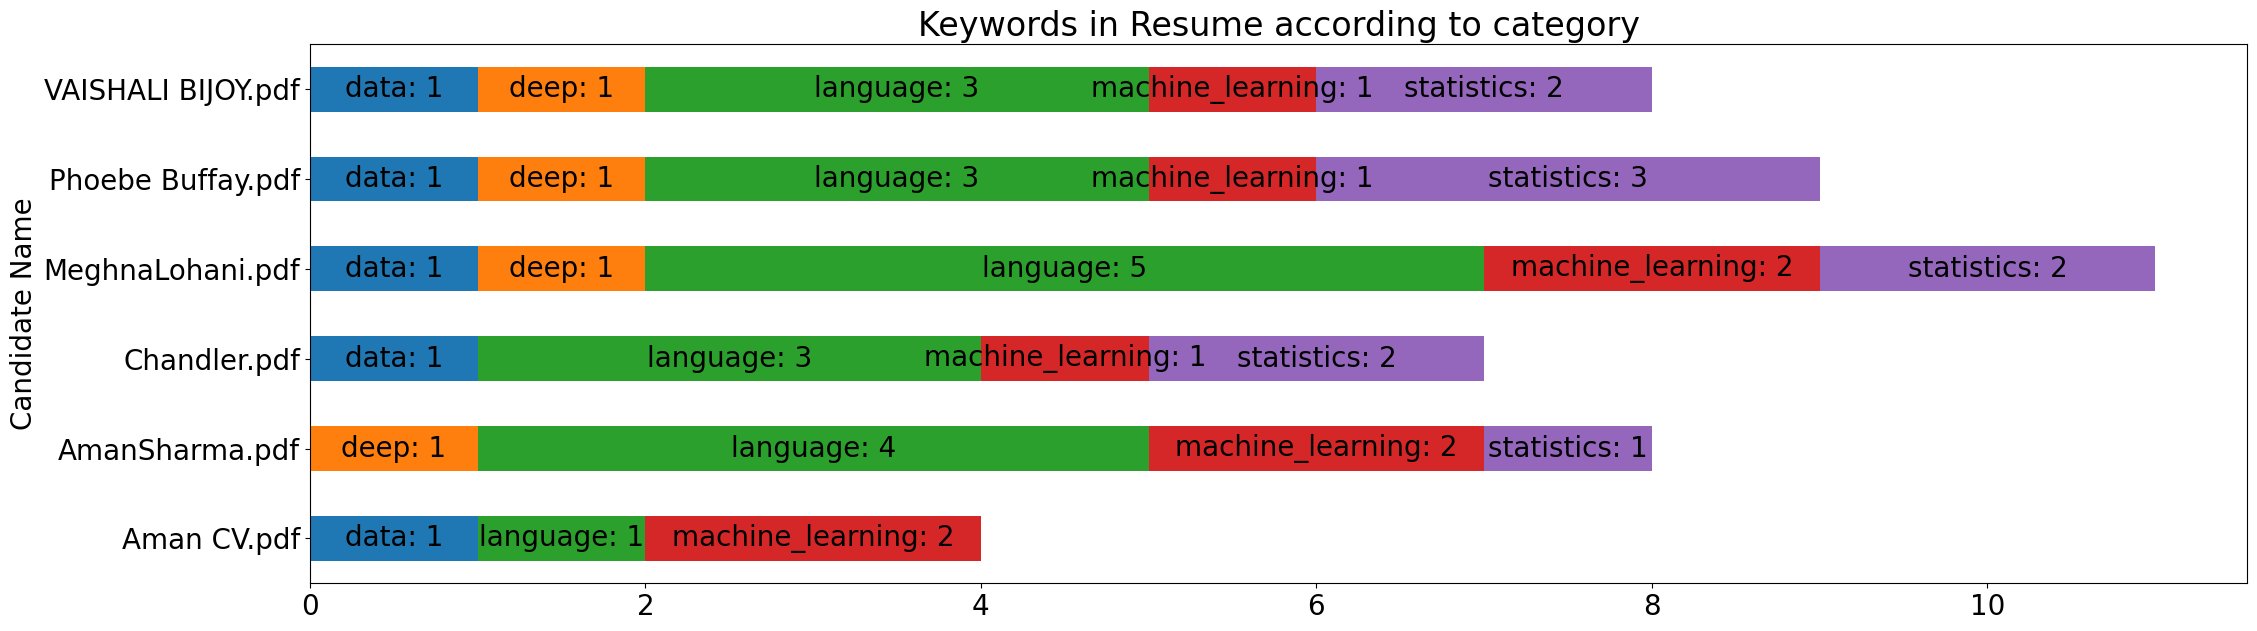

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 20})
ax = candidate_data.plot.barh(title="Keywords in Resume according to category", legend=False, figsize=(25,7), stacked=True)
skills = []
for j in candidate_data.columns:
    for i in candidate_data.index:
        skill = str(j)+": " + str(candidate_data.loc[i][j])
        skills.append(skill)
patches = ax.patches
for skill, rect in zip(skills, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., skill, ha='center', va='center')
plt.show()

# 
References

1. https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
2. https://www.shanelynn.ie/word-embeddings-in-python-with-spacy-and-gensim/
3. https://app.sketchengine.eu/
